# NLP_Project 1--IMDB Review - Sentimental Analysis

Find the 2 csv files (IMDB-Dataset 1.zip and IMDB-Dataset2.zip) under below link

link - https://github.com/training-ml/nlp

## Problem statement 

Build multiple machine learning models and select best one for sentiment analysis.
Based on user comment your model should be able to predict if the movie is worth to watch or not

In [1]:
# !pip3 install spacy

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import os
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer


In [3]:
# importing the dataset
data1 = pd.read_csv("IMDB-Dataset 1.csv")
data2 = pd.read_csv("IMDB-Dataset2.csv")

In [4]:
# top values of the data-set
data1.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
# top values of the data-set
data2.head()

,review,sentiment
0,This film should have never been made. Honestl...,negative
1,This movie was bad from the start. The only pu...,negative
2,"God, I never felt so insulted in my whole life...",negative
3,Not being a fan of the Coen Brothers or George...,positive
4,The movie Andaz Apna Apna in my books is the t...,positive


In [6]:
# shape of the data
print(data1.shape)
print(data2.shape)

(24999, 2)
(25001, 2)


In [7]:
# column names 
print(data1.columns)
print(data2.columns)

Index(['review', 'sentiment'], dtype='object')
Index(['review', 'sentiment'], dtype='object')


In [8]:
frames = [data1, data2]

data = pd.concat(frames)
#data =data1.concat(data2)

In [9]:
# top values of the data-set
print(data.shape)
data.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
#Summary of the dataset
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [11]:
# count of unique values in the column
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

# The dataset is balanced as there are equal number of data points in negative and positive sentiments.

In [12]:
# data from the bottom
data.tail(5)

,review,sentiment
24996,I thought this movie did a down right good job...,positive
24997,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
24998,I am a Catholic taught in parochial elementary...,negative
24999,I'm going to have to disagree with the previou...,negative
25000,No one expects the Star Trek movies to be high...,negative


# Processing the data

In [13]:
def clean_text1(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

cleaned1=lambda x:clean_text1(x)

In [14]:
data['review']=pd.DataFrame(data.review.apply(cleaned1))

In [15]:
data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [16]:
# second round of cleaning
def clean_text2(text):
    text=re.sub('[''"",,,]','',text)
    text=re.sub('\n','',text)
    return text

cleaned2=lambda x:clean_text2(x)

In [17]:
data['review']=pd.DataFrame(data.review.apply(cleaned2))
data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [18]:
#Removing special characters

#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Apply function on review column
data['review']=data['review'].apply(remove_special_characters)


# Text normalization

In [19]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

# Text stemming

In [20]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
data['review']=data['review'].apply(simple_stemmer)


# Removing stopwords

In [21]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

#Apply function on review column
data['review']=data['review'].apply(remove_stopwords)


{'who', 'all', 't', 'too', 'yours', 'does', "mightn't", 'which', 'through', 'was', 'were', 'been', 'any', 'this', 'isn', 'didn', "that'll", 'at', 'once', 'there', 'if', 'has', 'after', "should've", 'hasn', "didn't", 'shouldn', 'o', 've', 'needn', "mustn't", 'such', 'above', "shouldn't", 'are', 'own', 'd', 'am', 'the', 'of', 'having', "you've", 'from', 'you', 'out', 'their', "hasn't", 'in', 'where', 'those', 'our', 'we', 'them', 'him', 'against', 'your', 'while', 'a', 'with', 'doing', 'it', 'had', "needn't", 'mightn', 'most', 'off', 'no', 'shan', 'now', 'below', 'they', 'be', "couldn't", 'an', 'into', "aren't", 'her', 'ours', 'under', 'some', 'have', 'haven', 'its', "it's", 'until', "don't", 'these', 'ain', "she's", 'here', 'as', 'couldn', 'each', "you'll", 'me', "wasn't", 'itself', 'between', 'll', 'that', 'both', 'mustn', 'because', 's', 'himself', 'how', 'he', "doesn't", 'won', 'yourselves', "shan't", 'theirs', 'weren', "haven't", 'do', 'up', 'down', 'hadn', 'herself', 'to', 'further

# Splitting the Data

In [22]:
x = data.iloc[0:,0].values
y = data.iloc[0:,1].values



In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 225)

# Bags of words model

In [24]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(xtrain)
#transformed test reviews
cv_test_reviews=cv.transform(xtest)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (40000, 6066618)
BOW_cv_test: (10000, 6066618)


# Term Frequency-Inverse Document Frequency model (TFIDF)

In [25]:
tf = TfidfVectorizer()
from sklearn.pipeline import Pipeline

In [26]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
model=Pipeline([('vectorizer',tf),('classifier',classifier)])

model.fit(xtrain,ytrain)

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [27]:
ypred=model.predict(xtest)

In [28]:
# model score
accuracy_score(ypred,ytest)

0.8912

In [29]:
# confusion matrix
A=confusion_matrix(ytest,ypred)
print(A)

[[4421  604]
 [ 484 4491]]


In [30]:
# f1 score
recall=A[0][0]/(A[0][0]+A[1][0])
precision=A[0][0]/(A[0][0]+A[0][1])
F1=2*recall*precision/(recall+precision)
print(F1)

0.8904330312185298


#  Approach#2

In [31]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(xtrain)
#transformed test reviews
tv_test_reviews=tv.transform(xtest)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6066618)
Tfidf_test: (10000, 6066618)


# Labeling the sentiment text and splitting sentiment data

In [32]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(data['sentiment'])
print(sentiment_data.shape)
#Spliting the sentiment data
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

(50000, 1)
[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


# Model Training

In [33]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()


C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()


# Model performance on test data

In [34]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[1 0 0 ... 0 0 1]
[1 0 0 ... 0 0 1]


# Accuracy of the model

In [35]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.4965
mnb_tfidf_score : 0.4963


# Visualizing the classification report

In [36]:
#Classification report for bag of words 
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.50      0.50      0.50      4993
    Negative       0.50      0.49      0.50      5007

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000

              precision    recall  f1-score   support

    Positive       0.50      0.50      0.50      4993
    Negative       0.50      0.49      0.49      5007

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



In [37]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[2474 2533]
 [2502 2491]]
[[2461 2546]
 [2491 2502]]


# Visualizing Positive and Negative words by using WordCloud

<function matplotlib.pyplot.show(close=None, block=None)>

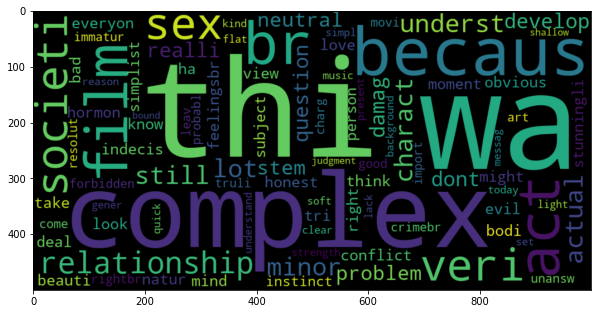

In [38]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=xtrain[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

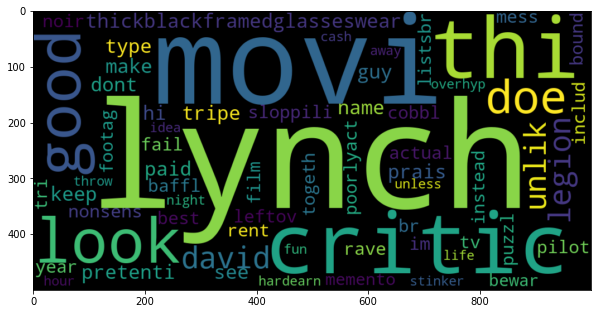

In [39]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=xtrain[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show